 # Data Mining in Yelp Data



Business objects contain basic information about local businesses. The fields are as follows:

```json
{
  'type': 'business',
  'business_id': (a unique identifier for this business),
  'name': (the full business name),
  'neighborhoods': (a list of neighborhood names, might be empty),
  'full_address': (localized address),
  'city': (city),
  'state': (state),
  'latitude': (latitude),
  'longitude': (longitude),
  'stars': (star rating, rounded to half-stars),
  'review_count': (review count),
  'photo_url': (photo url),
  'categories': [(localized category names)]
  'open': (is the business still open for business?),
  'schools': (nearby universities),
  'url': (yelp url)
}
```
### Checkin Objects
```json
{
    'type': 'checkin',
    'business_id': (encrypted business id),
    'checkin_info': {
        '0-0': (number of checkins from 00:00 to 01:00 on all Sundays),
        '1-0': (number of checkins from 01:00 to 02:00 on all Sundays),
        ...
        '14-4': (number of checkins from 14:00 to 15:00 on all Thursdays),
        ...
        '23-6': (number of checkins from 23:00 to 00:00 on all Saturdays)
    }, # if there was no checkin for a hour-day block it will not be in the dict
}
```

The Yelp Business dataset is a comprehensive source of data about different businesses, including information about their location, category, and ratings. This dataset's analysis can offer important insights into consumer behavior, industry trends, and customer preferences. For instance, by studying the characteristics of companies with high ratings, we can learn more about the elements that contribute to their success and apply this knowledge to enhance the performance of other companies. Similar to this, we may examine the characteristics of companies that get bad reviews and utilize this knowledge to pinpoint areas that need improvement.

In general, research into the analysis of massive datasets, such as the Yelp Business dataset, is essential since it can offer important insights into numerous facets of society. It is an intriguing issue that calls for cutting-edge analytical methods and tools and has the potential to have a big impact on businesses, academics, and society at large.

# Data Collection/Processing: 

In [39]:
import pandas as pd
from collections import Counter


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


### Importing Data

In [22]:
df = pd.read_json('yelp_academic_dataset_business.json', lines=True)

In [24]:
df.head(2)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Apn5Q_b6Nz61Tq4XzPdf9A,Minhas Micro Brewery,,1314 44 Avenue NE,Calgary,AB,T2E 6L6,51.091813,-114.031675,4.0,24,1,"{'BikeParking': 'False', 'BusinessAcceptsCredi...","Tours, Breweries, Pizza, Restaurants, Food, Ho...","{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'..."
1,AjEbIBw6ZFfln7ePHha9PA,CK'S BBQ & Catering,,,Henderson,NV,89002,35.960734,-114.939821,4.5,3,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...","Chicken Wings, Burgers, Caterers, Street Vendo...","{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0..."


In [25]:
df.describe()

,latitude,longitude,stars,review_count,is_open
count,188587.000000,188587.000000,188593.000000,188593.000000,188593.000000
mean,38.506793,-97.490873,3.631550,31.797310,0.830391
std,5.122684,17.693360,1.016783,104.124212,0.375290
min,-71.753941,-180.000000,1.000000,3.000000,0.000000
25%,33.630878,-112.279276,3.000000,4.000000,1.000000
50%,36.143595,-111.777460,3.500000,9.000000,1.000000
75%,43.593106,-79.982958,4.500000,24.000000,1.000000
max,85.051129,115.086769,5.000000,7968.000000,1.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   188593 non-null  object 
 1   name          188593 non-null  object 
 2   neighborhood  188593 non-null  object 
 3   address       188593 non-null  object 
 4   city          188593 non-null  object 
 5   state         188593 non-null  object 
 6   postal_code   188593 non-null  object 
 7   latitude      188587 non-null  float64
 8   longitude     188587 non-null  float64
 9   stars         188593 non-null  float64
 10  review_count  188593 non-null  int64  
 11  is_open       188593 non-null  int64  
 12  attributes    162807 non-null  object 
 13  categories    188052 non-null  object 
 14  hours         143791 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 21.6+ MB


# Data Exploration: Exploring the Yelp Dataset

**Finding the most popular business categories:** 


Restaurants         42730
Shopping            23095
Food                20674
Beauty & Spas       15146
Home Services       14158
Health & Medical    12536
Nightlife            9993
Local Services       9985
Bars                 8988
Automotive           7433
dtype: int64


<AxesSubplot: title={'center': 'Top 10 Categories of Business'}>

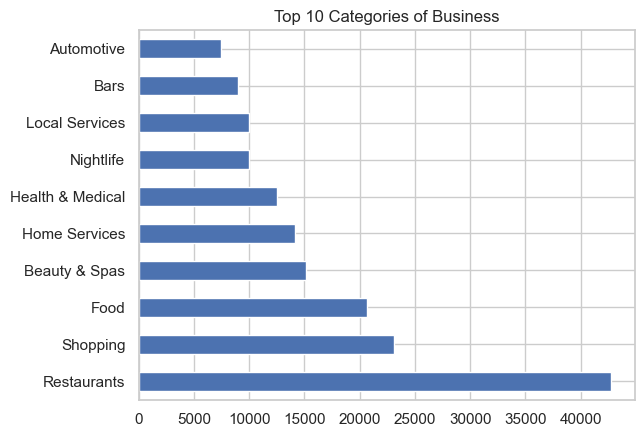

In [41]:
categories = df['categories'].dropna()

def to_1D(series):
    return pd.Series([x.strip() for _list in series for x in _list])

business_categories = to_1D(categories.str.split(","))
print(business_categories.value_counts()[:10])
business_categories.value_counts()[:10].plot(kind='barh', title='Top 10 Categories of Business')

**Finding the most popular business objects** 


In [28]:
checkin_df = pd.read_json('yelp_academic_dataset_checkin.json', lines=True)
checkin_df['checkin_info'] = checkin_df['checkin_info'].apply(lambda x: sum(x.values()))
print(checkin_df.sort_values(by='checkin_info', ascending=False)[:10])

       checkin_info     type             business_id
12285         77320  checkin  jf67Z1pnwElRSXllpQHiJg
2905          68711  checkin  hW0Ne_HTHEAgGF1rAdmR-g
828           29893  checkin  3Q0QQPnHcJuX1DLCL9G9Cg
31015         27356  checkin  AtjsjFzalWqJ7S9DUFQ4bw
25634         18208  checkin  JpHE7yhMS5ehA9e8WG_ETg
14255         18099  checkin  34uJtlPnKicSaX1V8_tu1A
14261         17671  checkin  eWPFXL1Bmu1ImtIa2Rqliw
14248         17419  checkin  -7yF42k0CcJhtPw51oaOqQ
15418         17161  checkin  z3SyT8blMIhsZNvKJgKcRA
19756         16641  checkin  2e2e7WgqU1BnpxmQL5jbfw




### Top 10 cities by # of businesses


In [30]:
pd.DataFrame(Counter(df.city.values).most_common(10), columns=['city','businesses'])

,city,businesses
0,Las Vegas,28865
1,Phoenix,18633
2,Toronto,18233
3,Charlotte,9204
4,Scottsdale,8822
5,Calgary,7384
6,Pittsburgh,6804
7,Mesa,6239
8,Montréal,6045
9,Henderson,4815


# The Solution: Implementing a data science solution to the problem 

Using data visualization techniques to uncover patterns and insights is one approach to analyzing the Yelp Business dataset of attributes. Data visualization can assist us in identifying trends, outliers, and relationships between different attributes. To explore the Yelp Business dataset, I used the following data visualization techniques:


Heatmaps:
    The distribution of restaurant types by location, for example, might be visualized using heatmaps to show the link between two categorical attributes. This enables us to determine which categories are most popular where we are.

Scatterplots:
    Scatterplots can be used to show how two attributes, such as review count and rating, relate to one another. Each data point is a company, and the position of the point on the plot reflects the value of the attribute being compared for which it is being used. By doing so, we can spot outliers and correlations.


Bar charts:
     Bar charts can be used to compare the frequency or distribution of different categories within a single attribute, such as the number of businesses in each category. This can help us identify which categories are most common or popular.


We can acquire important insights into the Yelp Business dataset by utilizing these and other data visualization approaches. We can then use this knowledge to enhance corporate performance, comprehend customer behavior, and influence public policy.


In [31]:
df.dropna(inplace=True)

# Select relevant features
features = df[['stars', 'review_count','longitude','latitude']]

# Scale the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [32]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(features_scaled)

KMeans(n_clusters=5, random_state=0)

# Results: summarizing and visualizing the results discovered from the analysis


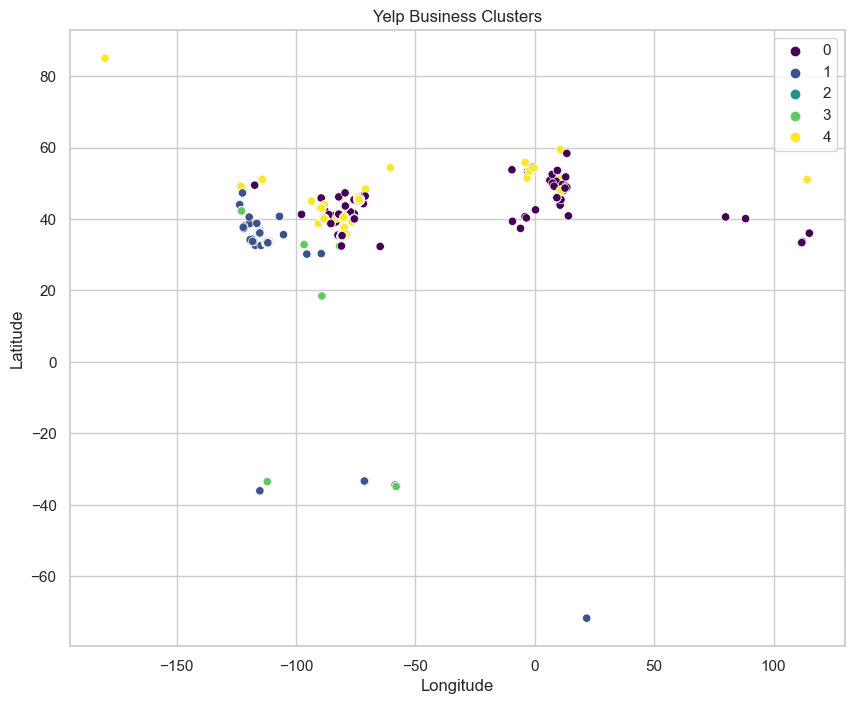

In [33]:
# Plot the businesses on a map
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=kmeans.labels_, palette='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Yelp Business Clusters')
plt.show()

In [34]:
open_businesses = df[(df['is_open'] == 1)]

def get_rests_from_attributes(*args):
    partof_rests = pd.DataFrame({'business_id':open_businesses['business_id'], 'name':open_businesses['name'], 'stars':open_businesses['stars']})
    def helper(attribute):
        attributes = []
        for a in open_businesses['attributes']:
            if attribute in a.keys():
                attributes.append(a[attribute])
            else:
                attributes.append(None)
        return attributes

    for i in range(len(args)):
        attribute = args[i]
        partof_rests[attribute.lower()] = helper(attribute)
    
    return partof_rests

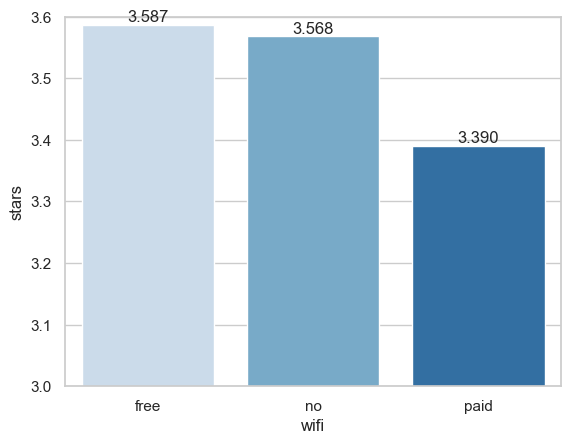

In [35]:
star_with_wifi = get_rests_from_attributes('WiFi').groupby(['wifi']).mean().reset_index()
sns.set(style="whitegrid")
ax = sns.barplot(x = 'wifi', y = 'stars', data = star_with_wifi, palette = 'Blues')
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate('{:.3f}'.format(y), (x.mean(), y), ha='center', va='bottom')
plt.ylim([3, 3.6]);


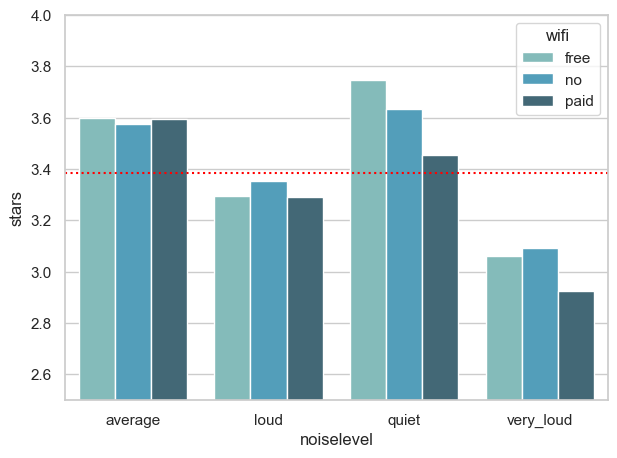

In [36]:
star_with_wifiandnoise = get_rests_from_attributes('NoiseLevel', 'WiFi').groupby(['noiselevel', 'wifi']).mean().reset_index()
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.barplot(x = 'noiselevel', y = 'stars', hue = 'wifi', data = star_with_wifiandnoise, palette = 'GnBu_d')
ax.axhline(
    y=star_with_wifiandnoise['stars'].mean(), 
    color='red',
    linestyle='dotted'
)
plt.ylim([2.5, 4]);

In [37]:
df['attributes'][1]

{'Alcohol': 'none',
 'BikeParking': 'False',
 'BusinessAcceptsCreditCards': 'True',
 'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}",
 'Caters': 'True',
 'DogsAllowed': 'True',
 'DriveThru': 'False',
 'GoodForKids': 'True',
 'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}",
 'HasTV': 'False',
 'OutdoorSeating': 'True',
 'RestaurantsAttire': 'casual',
 'RestaurantsDelivery': 'False',
 'RestaurantsGoodForGroups': 'True',
 'RestaurantsPriceRange2': '2',
 'RestaurantsReservations': 'False',
 'RestaurantsTableService': 'False',
 'RestaurantsTakeOut': 'True',
 'WheelchairAccessible': 'True',
 'WiFi': 'no'}

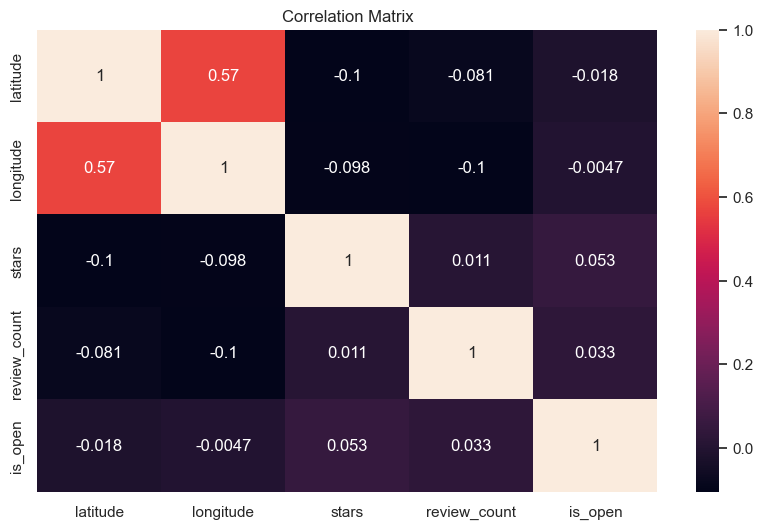

In [38]:
# compute the correlation matrix
corr_matrix = df.corr()
# plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True)
plt.show()


# Results: Conclusion

The above example we are using Kmeans Clustering Algorithm. It is an Unsupervised machine learning algorithm to cluster the businesses that share similar characteristics can be grouped together.


The K-means algorithm works by randomly selecting K initial centroids and then iteratively assigning each business to the nearest centroid based on a distance metric, such as Euclidean distance. The algorithm then re-computes the centroid of each cluster and re-assigns the businesses to the nearest centroid. This process continues until convergence, i.e., the clusters no longer change.

Once the K-means algorithm has converged, the resulting clusters can be analyzed to gain insights into the Yelp business dataset. For example, businesses in the same cluster may share similar characteristics such as similar business categories or similar ratings. 

All things considered, K-means clustering is a potent technique for investigating the Yelp business dataset and spotting trends and insights that can aid companies in performing better. To identify the optimum clustering solution, it is crucial to experiment with different values of K and centroid initialization techniques. This is because the quality of the clustering results depends on the selection of K and the initial centroids.